In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append('../sample_utilities/')
import samples
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
target_volume = 1700
n_samples = 20
target_dilution = 0.048 # mol Si/L saxs sample

In [34]:
samples_gen = []
for i in range(n_samples):
    sample = samples.SolidSilicaSample(target_volume, reactant_fp='./constants_2024_10_04_randbasev2.json')
    sample.generate_random_vol_fractions()
    sample.calculate_reactant_volumes()
    sample.calculate_dilution_volumefraction(target_dilution)
    sample.calculate_silica_mass_concentration()
    sample.calculate_silica_mass_fraction()
    samples_gen.append(sample)

In [35]:
samples_gen[0].silica_molecular_weight

60.08

In [36]:
synth_table = samples.generate_synthesis_table(samples_gen)

In [37]:
synth_table

,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction
0,4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674
1,a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207
2,3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085
3,0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353
4,68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352
5,fed3ab35-04e9-4916-8527-8627191a3bdc,20.153131,63.839548,49.461665,1566.545656,0.903794,3.190814,0.003982
6,32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9,180.798930,8.839735,227.609657,1282.751678,0.100743,28.625618,0.034357
7,a4d8a8f6-2654-490f-b14a-02d3fb1f94b2,247.365515,88.812691,77.661855,1286.159939,0.073633,39.165004,0.047439
8,770a433d-0480-4cee-bf12-ce066c24db55,99.547168,52.059757,14.533589,1533.859486,0.182971,15.761151,0.019630
9,41414be7-3e27-4b4d-b70e-e31d54a733d3,141.393978,8.798971,12.093150,1537.713901,0.128819,22.386692,0.027868


In [22]:
rows = ['A', 'B', 'C', 'D', 'E', 'F']
cols = [1, 2, 3, 4, 5, 6, 7, 8]

wells = []
for row in rows:
    for col in cols:
        if row in ['B', 'E'] and col in [2, 7]:
            pass
        else:
            wells.append(row + str(col))

In [23]:
synth_table['well'] = wells[0:len(synth_table)]

In [24]:
synth_table

,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,well
0,5b39c0c0-5aa1-4446-b234-6ac3587409ab,192.100962,125.808190,139.980924,1242.109924,0.094816,30.415051,A1
1,e1fb9b5b-54eb-4f2a-9903-91cd7efadc60,134.670403,80.213383,11.117164,1473.999051,0.135251,21.322159,A2
2,8f56c566-47b4-4936-a802-016231cf40b7,27.838273,37.709930,163.759886,1470.691911,0.654289,4.407591,A3
3,a0165d5d-3a1b-4051-81d6-115720b7f75b,19.320012,57.662449,125.526884,1497.490655,0.942768,3.058908,A4
4,dccc7f14-b375-48ee-b9a2-26af7d46b938,122.347909,45.727604,81.884604,1450.039883,0.148873,19.371157,A5
5,4bd81080-2ff5-4d6e-8f05-c991336337e1,108.975520,103.941414,68.998691,1418.084374,0.167141,17.253927,A6
6,d438a53e-c752-44d2-b214-58aae70fe28f,76.723512,142.498106,104.084469,1376.693912,0.237402,12.147516,A7
7,eefe2cc5-181d-42a5-a01d-ec18934cb903,97.116771,12.528825,131.304081,1459.050323,0.187550,15.376350,A8
8,1ad648af-fc1c-4d4c-937e-273804cfc761,19.485887,177.374203,228.939050,1274.200860,0.934742,3.085171,B1
9,5c185f4e-ca8f-4c6d-a0ca-46419c6c48a1,175.233828,156.286096,49.926309,1318.553766,0.103943,27.744504,B3


In [25]:
synth_table.to_csv('Sample_table_2024_10_04_randomsampleV2.csv')

In [3]:
synth_table = pd.read_csv('Sample_table_2024_10_02_randomsampleStobercampaign.csv')

In [5]:
synth_table.teos_volume.sum()

10041.90927123762

In [6]:
synth_table.ammonia_volume.sum()

3759.1246288585803

In [8]:
synth_table.water_volume.sum()

10056.576677824894

In [ ]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(synth_table['teos_volume'], synth_table['ammonia_volume'])
ax[0,1].scatter(synth_table['teos_volume'], synth_table['water_volume'])
ax[1,0].scatter(synth_table['teos_volume'], synth_table['ethanol_volume'])
ax[1,1].scatter(synth_table['ammonia_volume'], synth_table['water_volume'])

<Axes: >

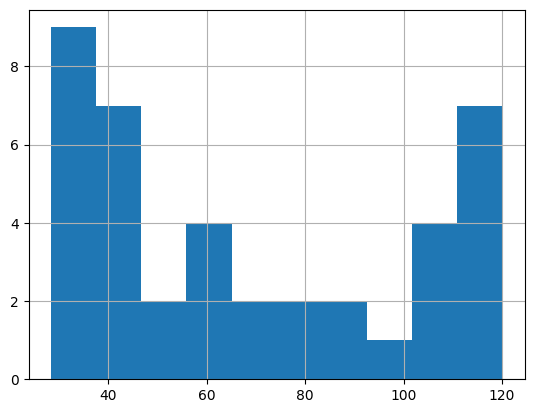

In [37]:
synth_table.ammonia_volume.hist()

<Axes: >

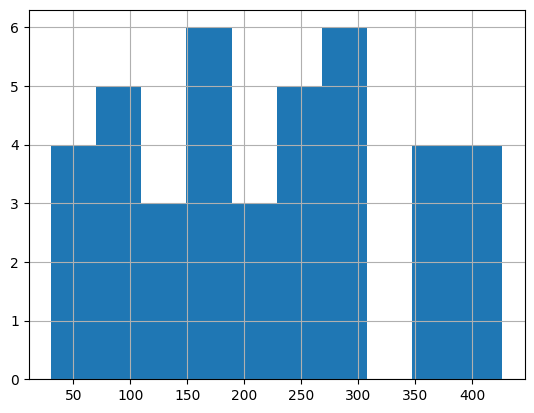

In [38]:
synth_table.water_volume.hist()